In [62]:
import pandas as pd
filename = 'C:/Users/diaga/OneDrive/Documents/Springboard/Online Retail.xlsx'
data = pd.read_excel(filename)
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [63]:
data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [64]:
#len(data[data.UnitPrice < 0 ])
len(data[data.CustomerID.isna()])
#data[data.CustomerID.isna()].groupby('Country').count()
#data[data.CustomerID.isna()].groupby(['Country','Description'])['InvoiceNo'].count().sort_values(ascending=False).head(60)

135080

In [33]:
len(data[data.UnitPrice < 0 ])
print(data[data.UnitPrice < 0 ])

       InvoiceNo StockCode      Description  Quantity         InvoiceDate  \
299983   A563186         B  Adjust bad debt         1 2011-08-12 14:51:00   
299984   A563187         B  Adjust bad debt         1 2011-08-12 14:52:00   

        UnitPrice  CustomerID         Country  
299983  -11062.06         NaN  United Kingdom  
299984  -11062.06         NaN  United Kingdom  


In [65]:
len(data)

541909

In [131]:
data_clean = data[data['CustomerID'].notna()]
len(data_clean[data_clean.Quantity < 0 ])

8905

In [161]:
#data_clean = data_clean[data_clean['Quantity']]
len(data_clean)

406829

In [67]:
data_clean[['StockCode','Quantity','Country','UnitPrice']].nunique()

StockCode    3684
Quantity      436
Country        37
UnitPrice     620
dtype: int64

In [68]:
data_clean.groupby(['StockCode'])['UnitPrice'].nunique().sort_values(ascending=False).head()

StockCode
M       184
D        75
POST     71
DOT      16
CRUK     16
Name: UnitPrice, dtype: int64

In [69]:
test = data_clean.groupby(['StockCode'])['UnitPrice'].nunique()
test[test>1].count()

2642

In [ ]:
#import matplotlib.pyplot as plt
#_ = plt.hist(data_clean['UnitPrice'])
#plt.show()

In [136]:
from datetime import datetime
data_clean.loc[:,'Invoice_DAY'] = pd.to_datetime(data_clean.loc[:,'InvoiceDate']).dt.strftime('%m/%d/%Y').copy()
data_clean.loc[:,'InvoiceCost'] = data_clean.loc[:,'Quantity'] * data_clean.loc[:,'UnitPrice'].copy()
data_clean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_DAY,InvoiceCost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12/01/2010,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12/01/2010,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12/01/2010,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12/01/2010,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12/01/2010,20.34


In [137]:
data_clean.loc[:,'Invoice_DAY'] = pd.to_datetime(data_clean.loc[:,'Invoice_DAY'])
data_clean.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
Invoice_DAY    datetime64[ns]
InvoiceCost           float64
dtype: object

In [112]:
data_time = pd.DataFrame(data_clean.groupby('Invoice_DAY')['Quantity'].sum())
data_time['pandas_SMA_7'] = data_time.iloc[:,0].rolling(window=7).mean()
data_time['pandas_SMA_28'] = data_time.iloc[:,0].rolling(window=28).mean()
print(data_time.head(30))

             Quantity  pandas_SMA_7  pandas_SMA_28
Invoice_DAY                                       
2010-12-01      24032           NaN            NaN
2010-12-02      20855           NaN            NaN
2010-12-03      11548           NaN            NaN
2010-12-05      16394           NaN            NaN
2010-12-06      16095           NaN            NaN
2010-12-07      19351           NaN            NaN
2010-12-08      21275  18507.142857            NaN
2010-12-09      16904  17488.857143            NaN
2010-12-10      15388  16707.857143            NaN
2010-12-12      10561  16566.857143            NaN
2010-12-13      15234  16401.142857            NaN
2010-12-14      17108  16545.857143            NaN
2010-12-15      18169  16377.000000            NaN
2010-12-16      29482  17549.428571            NaN
2010-12-17      10517  16637.000000            NaN
2010-12-19       3735  14972.285714            NaN
2010-12-20      12617  15266.000000            NaN
2010-12-21      10888  14645.14

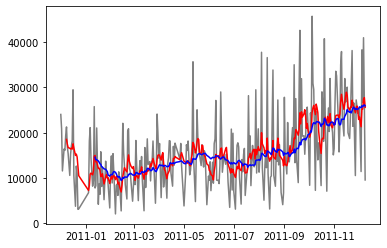

In [115]:
import matplotlib.pyplot as plt
plt.plot(data_time['Quantity'], color='grey')
plt.plot(data_time['pandas_SMA_7'], color='red')
plt.plot(data_time['pandas_SMA_28'], color='blue')

In [123]:
data_mean = data_clean.groupby('CustomerID').mean().drop('Quantity', axis = 1).rename(columns={'UnitPrice': 'UnitPrice_Mean', 'InvoiceCost': 'InvoiceCost_Mean'})
data_mean.head()

,UnitPrice_Mean,InvoiceCost_Mean
CustomerID,,
12346.0,1.040000,0.000000
12347.0,2.644011,23.681319
12348.0,5.764839,57.975484
12349.0,8.289041,24.076027
12350.0,3.841176,19.670588


In [143]:
data_count = data_clean.groupby('CustomerID').nunique().drop(['Description','Quantity','UnitPrice','CustomerID','InvoiceCost'], axis = 1)
data_count.columns = ['Transaction_Ct1','StockCode_UniqueCt','Transaction_Ct2','Country_Ct','Day_Ct']
data_count.head()

,Transaction_Ct1,StockCode_UniqueCt,Transaction_Ct2,Country_Ct,Day_Ct
CustomerID,,,,,
12346.0,2,1,2,1,1
12347.0,7,103,7,1,7
12348.0,4,22,4,1,4
12349.0,1,73,1,1,1
12350.0,1,17,1,1,1


In [147]:
data_sum = data_clean.groupby('CustomerID').sum().drop('UnitPrice',axis=1)
data_sum.columns = ['Total_Quantity','Total_Spend']
data_sum.head()

,Total_Quantity,Total_Spend
CustomerID,,
12346.0,0,0.00
12347.0,2458,4310.00
12348.0,2341,1797.24
12349.0,631,1757.55
12350.0,197,334.40


,UnitPrice_Mean,InvoiceCost_Mean,Transaction_Ct1,StockCode_UniqueCt,Transaction_Ct2,Country_Ct,Day_Ct,Total_Quantity,Total_Spend
CustomerID,,,,,,,,,
12346.0,1.040000,0.000000,2,1,2,1,1,0,0.00
12347.0,2.644011,23.681319,7,103,7,1,7,2458,4310.00
12348.0,5.764839,57.975484,4,22,4,1,4,2341,1797.24
12349.0,8.289041,24.076027,1,73,1,1,1,631,1757.55
12350.0,3.841176,19.670588,1,17,1,1,1,197,334.40


,UnitPrice_Mean,InvoiceCost_Mean,Transaction_Ct1,StockCode_UniqueCt,Transaction_Ct2,Country_Ct,Day_Ct,Total_Quantity,Total_Spend
CustomerID,,,,,,,,,
12346,1.040000,0.000000,2,1,2,1,1,0,0.00
12347,2.644011,23.681319,7,103,7,1,7,2458,4310.00
12348,5.764839,57.975484,4,22,4,1,4,2341,1797.24
12349,8.289041,24.076027,1,73,1,1,1,631,1757.55
12350,3.841176,19.670588,1,17,1,1,1,197,334.40


In [203]:
data_clean = data_clean.sort_values(by='Invoice_DAY') 
data_IFR = data_clean.groupby('CustomerID')['Invoice_DAY'].apply(lambda x: x.diff().mean()).dt.days
data_IFR = pd.DataFrame(data_IFR).rename(columns={'Invoice_DAY': 'days_IFR'})
data_IFR.head()

,days_IFR
CustomerID,
12346.0,0.0
12347.0,2.0
12348.0,9.0
12349.0,0.0
12350.0,0.0


In [204]:
data_final = pd.merge(data_mean, data_count, on = 'CustomerID', how='outer')
data_final = pd.merge(data_final, data_sum, on = 'CustomerID', how='outer')
data_final = pd.merge(data_final, data_IFR, on = 'CustomerID', how='outer')
data_final.head()

,UnitPrice_Mean,InvoiceCost_Mean,Transaction_Ct1,StockCode_UniqueCt,Transaction_Ct2,Country_Ct,Day_Ct,Total_Quantity,Total_Spend,days_IFR
CustomerID,,,,,,,,,,
12346.0,1.040000,0.000000,2,1,2,1,1,0,0.00,0.0
12347.0,2.644011,23.681319,7,103,7,1,7,2458,4310.00,2.0
12348.0,5.764839,57.975484,4,22,4,1,4,2341,1797.24,9.0
12349.0,8.289041,24.076027,1,73,1,1,1,631,1757.55,0.0
12350.0,3.841176,19.670588,1,17,1,1,1,197,334.40,0.0


In [205]:
data_final.index = data_final.index.map(int)
data_final.head()

,UnitPrice_Mean,InvoiceCost_Mean,Transaction_Ct1,StockCode_UniqueCt,Transaction_Ct2,Country_Ct,Day_Ct,Total_Quantity,Total_Spend,days_IFR
CustomerID,,,,,,,,,,
12346,1.040000,0.000000,2,1,2,1,1,0,0.00,0.0
12347,2.644011,23.681319,7,103,7,1,7,2458,4310.00,2.0
12348,5.764839,57.975484,4,22,4,1,4,2341,1797.24,9.0
12349,8.289041,24.076027,1,73,1,1,1,631,1757.55,0.0
12350,3.841176,19.670588,1,17,1,1,1,197,334.40,0.0
